In [1]:
import pandas as pd
import matplotlib.pyplot as plt
vgsales = pd.read_csv('vgsales.csv')
vgsales

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


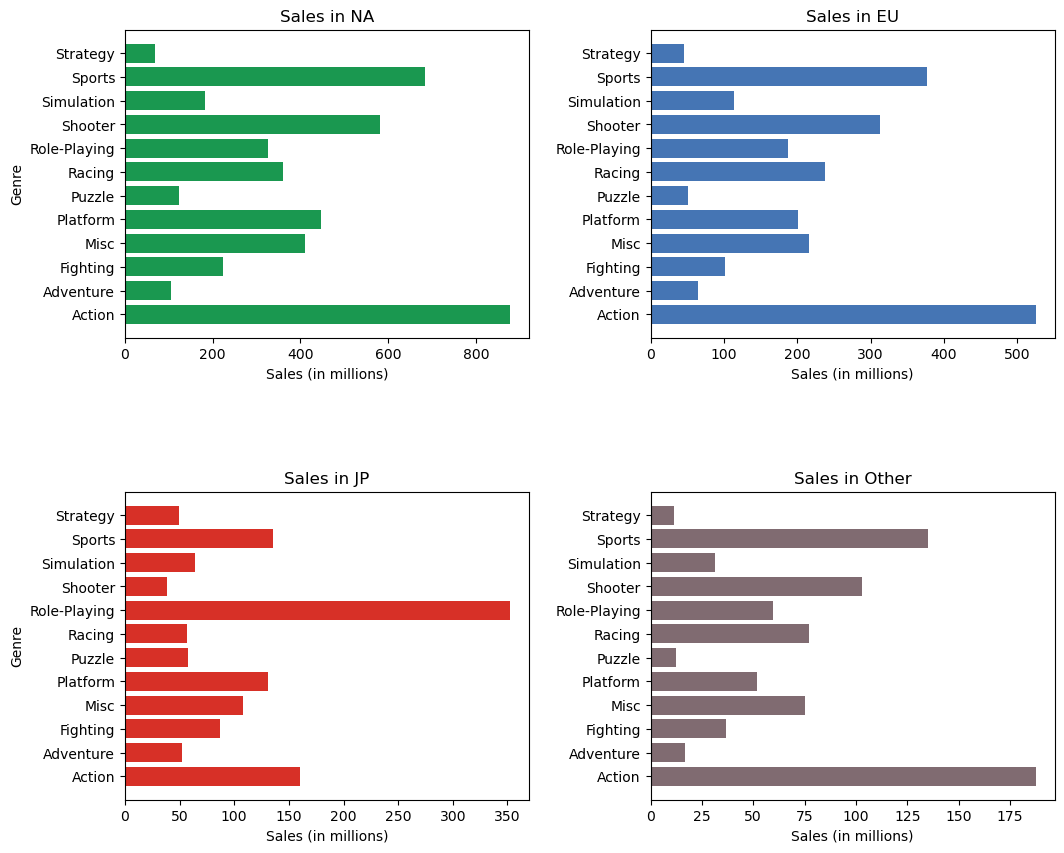

In [2]:
# Since the dataset is already loaded into 'vgsales', let's proceed with the analysis.

# Grouping data by Genre and calculating total sales for each region within each genre.
sales_by_genre = vgsales.groupby('Genre').sum()[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Define the color scale based on region
colors = {
    'NA_Sales': '#1a9850',
    'EU_Sales': '#4575b4',
    'JP_Sales': '#d73027',
    'Other_Sales': '#806b71'
}

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the Axes array for easy iteration and adjust the subplots layout
axs = axs.flatten()
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Loop through each region to create a bar chart
for idx, region in enumerate(colors.keys()):
    axs[idx].barh(sales_by_genre.index, sales_by_genre[region], color=colors[region])
    axs[idx].set_title(f'Sales in {region.replace("_Sales", "")}')
    axs[idx].set_xlabel('Sales (in millions)')
    if idx % 2 == 0:
        axs[idx].set_ylabel('Genre')

plt.savefig('sales vs genre.png')

plt.show()
